In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv('Data_Train.csv') #Reading the datafiles and loading the training dataset in jupyter notebook.
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df1=pd.read_csv('Test_set.csv')   #Reading the datafiles and loading the test dataset in jupyter notebook.
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
df.shape     #Finding the shape of train dataset

(10683, 11)

In [5]:
df1.shape    #Finding the shape of test dataset

(2671, 10)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.isnull().sum() #checking if their is any null value in any columns in train dataset

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head())

     Route Total_Stops
9039   NaN         NaN


In [9]:
df.dropna(inplace=True)

In [10]:
duplicateRowsDF = df[df.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(220, 11)

In [11]:
df.drop_duplicates(keep='first',inplace=True) #dropping the unnecessary column

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [14]:
df1["Additional_Info"].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [15]:
df1["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [16]:
df.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df1.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df["Total_Stops"] = df["Total_Stops"].astype(int)
df1["Total_Stops"] = df1["Total_Stops"].astype(int)

In [17]:
df["Total_Stops"].dtype

dtype('int32')

In [18]:
df["isWeekend"] = ((pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df["Day_of_Week"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df["Day_Of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df["Month_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.month

df1["isWeekend"] = ((pd.to_datetime(df1["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df1["Day_Of_Journey"] = pd.to_datetime(df1["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df1["Day_of_Week"] = pd.to_datetime(df1["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df1["Month_of_Journey"] = pd.to_datetime(df1["Date_of_Journey"], format = '%d/%m/%Y').dt.month

In [19]:
df.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)  #dropping the unnecessary column

In [20]:
df1.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [21]:
duration = list(df["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
df["Duration_minutes"] = dur_minutes
df.drop(["Duration"], axis=1, inplace = True)

In [22]:
duration = list(df1["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
df1["Duration_minutes"] = dur_minutes
df1.drop(labels = 'Duration', axis = 1, inplace = True)

In [23]:
df['Depart_Time_Hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Depart_Time_Minutes'] = pd.to_datetime(df.Dep_Time).dt.minute
df.drop(labels = 'Dep_Time', axis = 1, inplace = True)
df['Arr_Time_Hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arr_Time_Minutes'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [24]:
df1['Depart_Time_Hour'] = pd.to_datetime(df1.Dep_Time).dt.hour
df1['Depart_Time_Minutes'] = pd.to_datetime(df1.Dep_Time).dt.minute
df1.drop(labels = 'Dep_Time', axis = 1, inplace = True)
df1['Arr_Time_Hour'] = pd.to_datetime(df1.Arrival_Time).dt.hour
df1['Arr_Time_Minutes'] = pd.to_datetime(df1.Arrival_Time).dt.minute
df1.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [25]:
X = df.drop(["Price"], axis=1)

In [26]:
y = np.log1p(df["Price"])

In [27]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0,No info,1,Sunday,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2,No info,0,Wednesday,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2,No info,1,Sunday,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1,No info,1,Sunday,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1,No info,0,Friday,1,3,285,16,50,21,35


In [28]:
X_to_predict = df1

In [29]:
X_categorical = X.select_dtypes(exclude=['int', 'float']) 
X_numerical = X.select_dtypes(include=['int', 'float'])

In [30]:
X_to_predict_categorical = X_to_predict.select_dtypes(exclude=['int', 'float'])
X_to_predict_numerical = X_to_predict.select_dtypes(include=['int', 'float'])

In [31]:
X_categorical.head()

,Airline,Source,Destination,Route,Additional_Info,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info,Sunday,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,Wednesday,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,Sunday,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info,Sunday,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info,Friday,1,3,285,16,50,21,35


In [32]:
X_numerical_graph = X_numerical.copy()
X_categorical_graph = X_categorical.copy()

In [33]:
X_categorical.shape

(10462, 13)

In [34]:
X_categorical["Airline"].replace(to_replace={'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

C:\Users\sodainmind\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [35]:
X_to_predict_categorical["Airline"].replace(to_replace={'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

In [36]:
X_categorical["Additional_Info"].replace(to_replace={'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

In [37]:
X_to_predict_categorical["Additional_Info"].replace(to_replace={'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

In [38]:
X_categorical.head()

,Airline,Source,Destination,Route,Additional_Info,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info,Sunday,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,Wednesday,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,Sunday,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info,Sunday,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info,Friday,1,3,285,16,50,21,35


In [39]:
X_categorical["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Other                             14
Name: Additional_Info, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
X_categorical = X_categorical.apply(LabelEncoder().fit_transform)
X_to_predict_categorical = X_to_predict_categorical.apply(LabelEncoder().fit_transform)

In [43]:
X_categorical.head()

,Airline,Source,Destination,Route,Additional_Info,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,3,0,5,18,3,3,8,0,13,22,4,1,2
1,1,3,0,84,3,6,0,2,65,5,10,13,3
2,4,2,1,118,3,3,3,3,202,9,5,4,5
3,3,3,0,91,3,3,4,2,41,18,1,23,6
4,3,0,5,29,3,0,0,0,33,16,10,21,7


In [44]:
X = pd.concat([X_categorical, X_numerical], axis=1)
X_to_predict = pd.concat([X_to_predict_categorical, X_to_predict_numerical], axis=1)

In [45]:
print(X.shape, X_numerical.shape, X_categorical.shape)
print(X_to_predict.shape, X_to_predict_numerical.shape, X_to_predict_categorical.shape)
print(y.shape)

(10462, 15) (10462, 2) (10462, 13)
(2671, 15) (2671, 2) (2671, 13)
(10462,)


In [74]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error

In [75]:
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [77]:
regressor = LinearRegression()  

In [78]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred = regressor.predict(X_test)

In [80]:
print(print_accuracy_report(y_test, y_pred, X_test, regressor))

R Squared(Accuracy) 0.5494944429469819
Mean Absolute Error: 0.2836726842831008
Mean Squared Error: 0.12204545553465843
Root Mean Squared Error: 0.349350047280172
Root Mean Squared Log Error 0.03503588311153928
None


In [81]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score

In [82]:
 re = BayesianRidge()  

In [83]:
re.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [84]:
y_pred = regressor.predict(X_test)

In [85]:
print(print_accuracy_report(y_test, y_pred, X_test, regressor))

R Squared(Accuracy) 0.5494944429469819
Mean Absolute Error: 0.2836726842831008
Mean Squared Error: 0.12204545553465843
Root Mean Squared Error: 0.349350047280172
Root Mean Squared Log Error 0.03503588311153928
None


In [86]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rf = RandomForestRegressor()

In [97]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [98]:
y_pred = rf.predict(X_test)

In [99]:
print(print_accuracy_report(y_test, y_pred, X_test,rf))

R Squared(Accuracy) 0.9421303016592832
Mean Absolute Error: 0.06794421296069596
Mean Squared Error: 0.015677350889624794
Root Mean Squared Error: 0.12520922845231813
Root Mean Squared Log Error 0.012483758871593536
None


In [100]:
from sklearn.ensemble import ExtraTreesRegressor

In [101]:
ET = ExtraTreesRegressor()

In [102]:
ET.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [103]:
 y_pred = ET.predict(X_test)

In [104]:
print(print_accuracy_report(y_test, y_pred, X_test, ET))

R Squared(Accuracy) 0.9451874926154499
Mean Absolute Error: 0.06281442330090378
Mean Squared Error: 0.014849134107255798
Root Mean Squared Error: 0.12185702321678385
Root Mean Squared Log Error 0.01213971363101809
None


In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
gb = GradientBoostingRegressor()

In [107]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
y_pred = gb.predict(X_test)

In [109]:
print(print_accuracy_report(y_test, y_pred, X_test, gb))

R Squared(Accuracy) 0.8717159940604295
Mean Absolute Error: 0.13793375401927802
Mean Squared Error: 0.03475313389056189
Root Mean Squared Error: 0.18642192438273425
Root Mean Squared Log Error 0.01875397954553881
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBF78F7F48>,
      dtype=object)

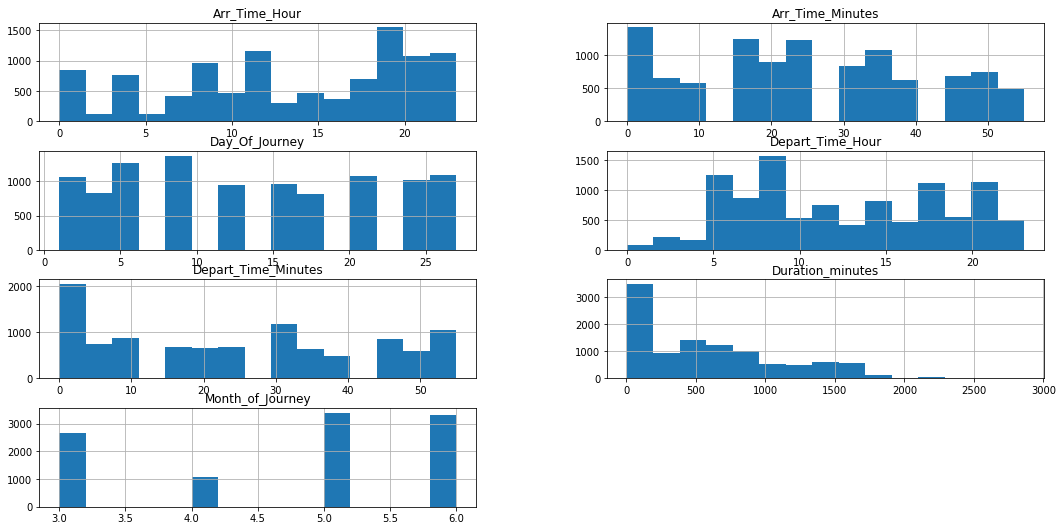

In [114]:
X_categorical_graph.hist(bins=15, figsize=(18, 16), layout=(7, 2))

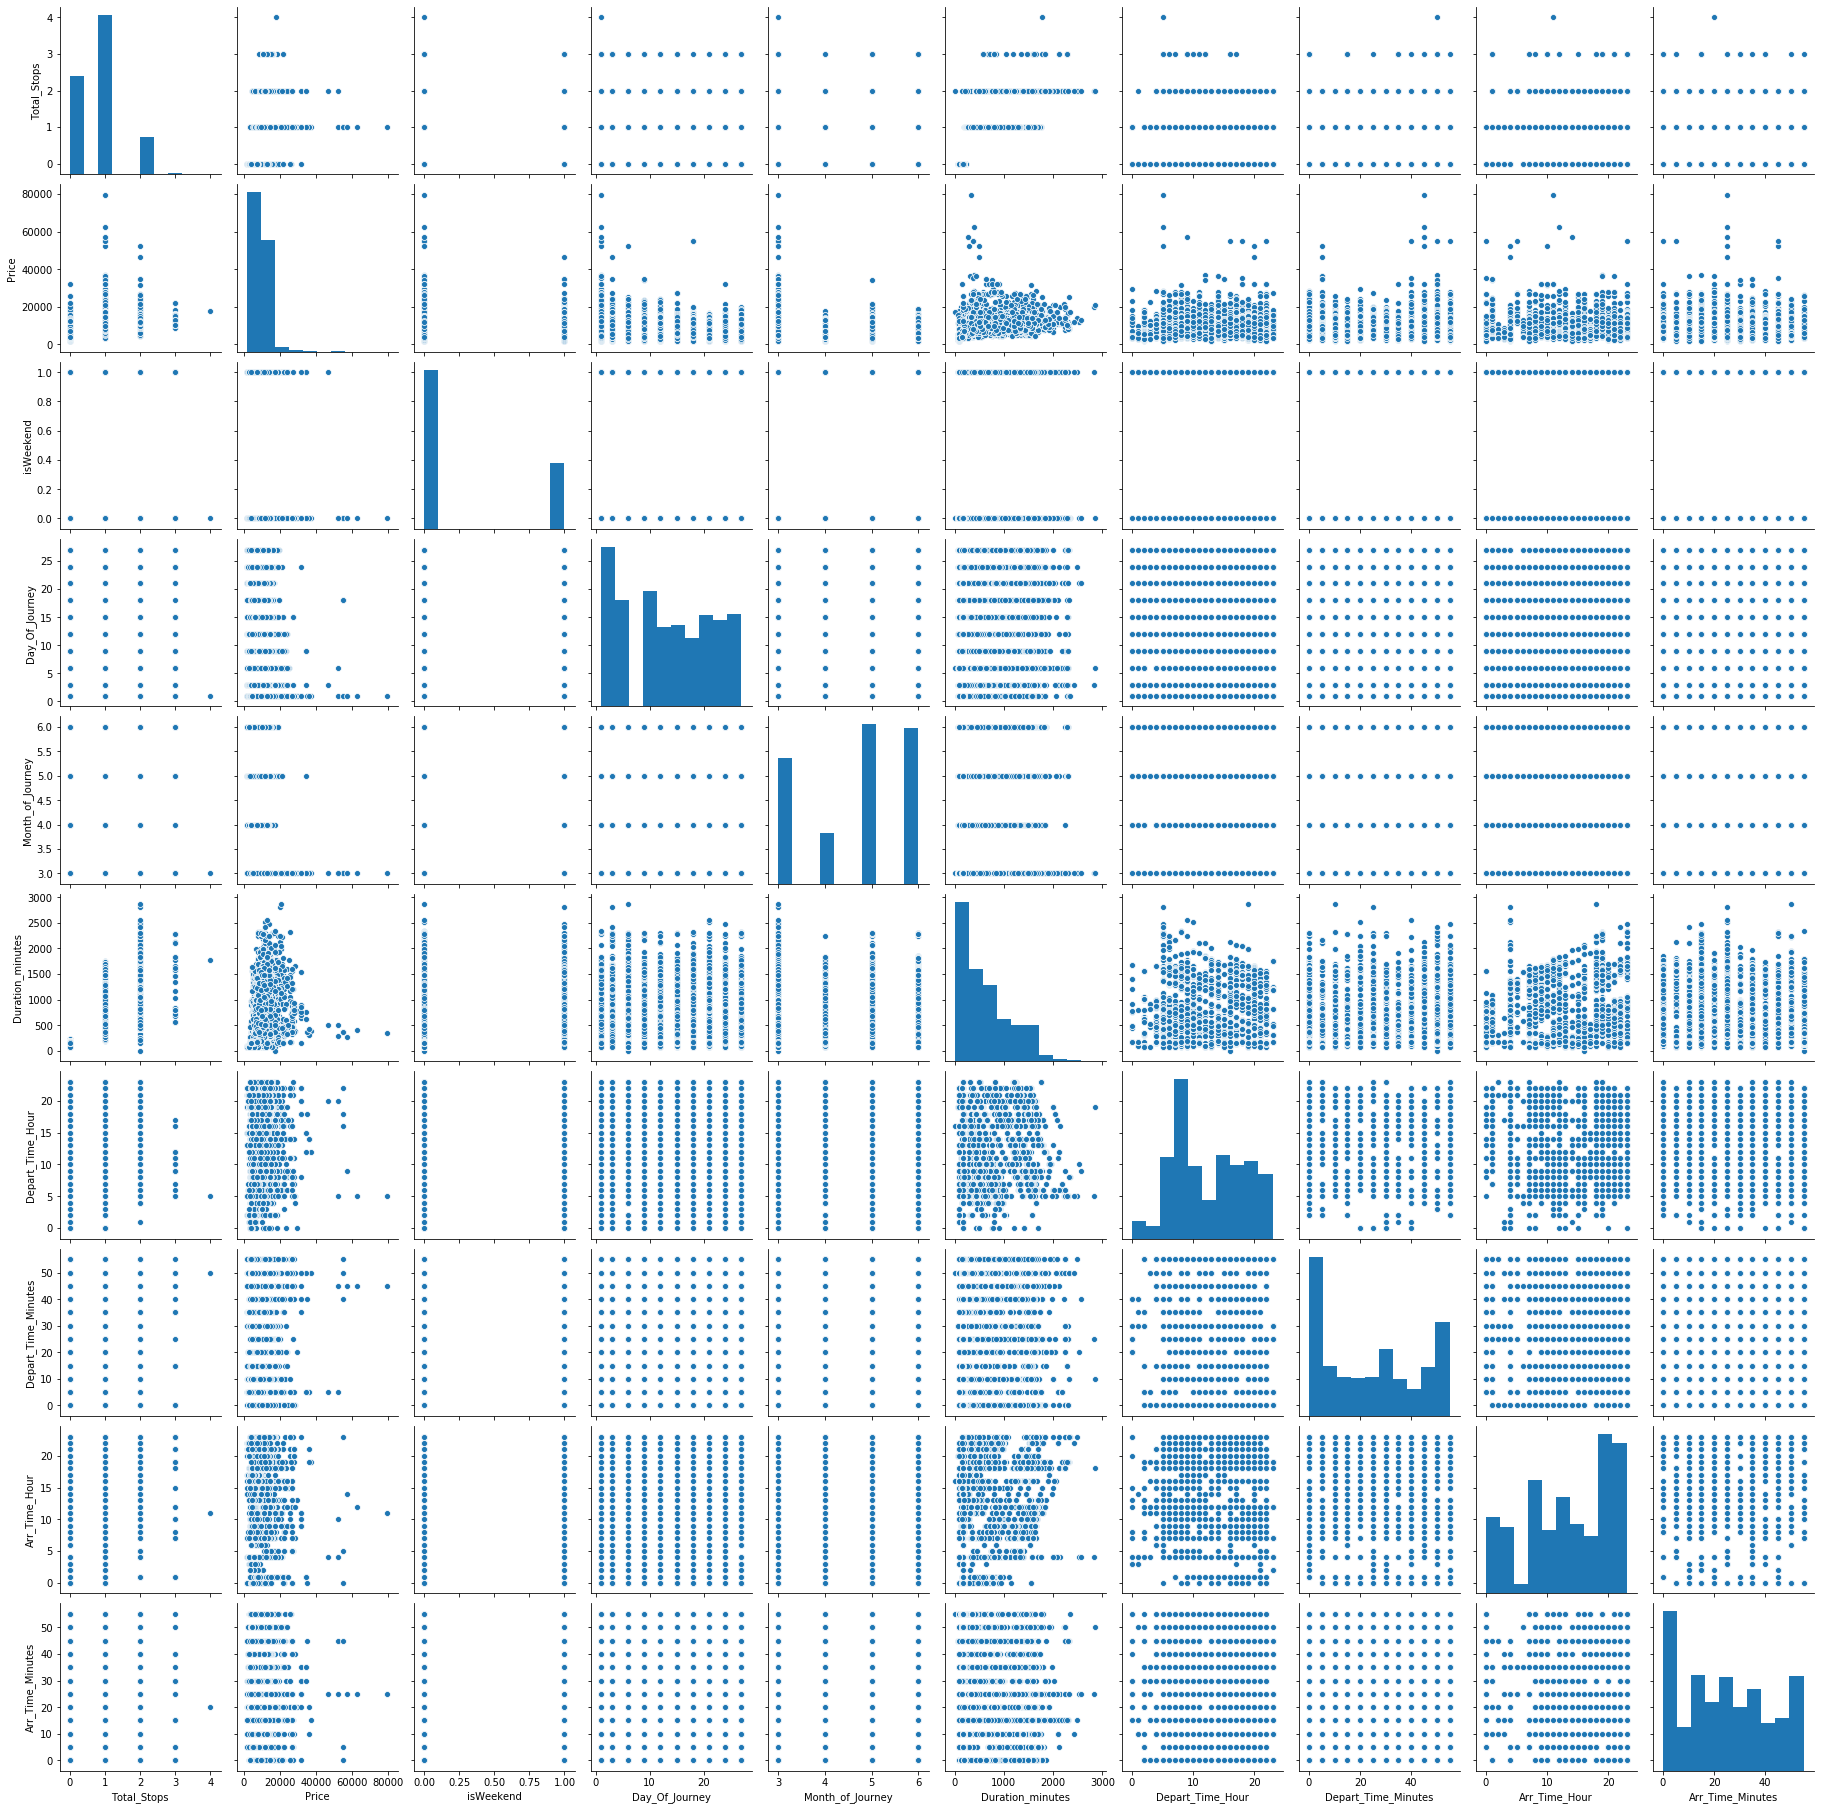

In [117]:
sns.pairplot(df)

In [119]:
corr = df.corr()

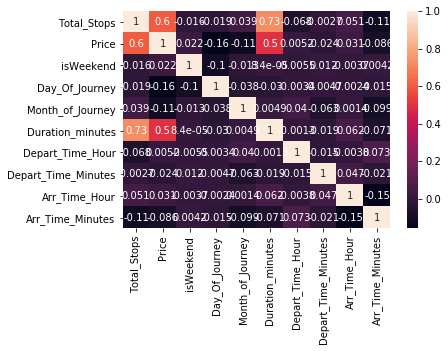

In [120]:
sns.heatmap(corr,annot=True)

Conclusion: 

            1. One of the outcome is flight prices vary over various months and across the holiday.
            2.Airfare is higher for weekends and Monday and slightly lower for the other days.
            3. There are some route where prices are drop suddeny,hence there is an error while predicting the model.
            
    